In [1]:
import pandas as pd

## Loading Lightning Error

In [2]:
lightning_error = pd.read_csv("data/Salesforce/Salesforce/ELF/LightningError/2022-06-06_LightningError.csv")

In [3]:
lightning_error.shape

(7254, 39)

In [4]:
# Remove missing values in any of the following columns 
lightning_error = lightning_error.dropna(subset = ['PAGE_URL'])
#lightning_error = [PAGE_URL for PAGE_URL in lightning_error if not(pd.isnull(PAGE_URL)) == True]

In [5]:
lightning_error.shape

(7012, 39)

## Loading Active Reports

In [6]:
active_reports = pd.read_csv("datasets/active_reports.csv")

Getting ***Report_Id*** by ***Page_Url***

In [7]:
run_report_api_resource = "/lightning/r/"

def get_report_info_from_endpoint(page_url):
    if not(pd.isnull(page_url)) == True: 
        if page_url.startswith(run_report_api_resource):
            uri = page_url.split(run_report_api_resource)
            if len(uri) >= 2:
                report_type, report_id_derived = uri[1].split("/")[:2]
                return report_type, report_id_derived

In [8]:
lightning_error['REPORT_INFO_DERIVED'] = lightning_error.PAGE_URL.apply(get_report_info_from_endpoint)

In [9]:
lightning_error['REPORT_TYPE_DERIVED'] = lightning_error.REPORT_INFO_DERIVED.str[0]

In [10]:
lightning_error['REPORT_ID_DERIVED'] = lightning_error.REPORT_INFO_DERIVED.str[1]

In [11]:
lightning_error.shape

(7012, 42)

## Merging Lightning Error and Active Reports

In [12]:
ltng_full_reports = pd.merge(left=active_reports, right=lightning_error, left_on="Id", right_on="REPORT_ID_DERIVED")

In [13]:
list(ltng_full_reports.columns)

['CreatedById',
 'CreatedDate',
 'Description',
 'DeveloperName',
 'FolderName',
 'Format',
 'Id',
 'IsDeleted',
 'LastModifiedById',
 'LastModifiedDate',
 'LastReferencedDate',
 'LastRunDate',
 'LastViewedDate',
 'Name',
 'NamespacePrefix',
 'OwnerId',
 'ReportTypeApiName',
 'SystemModstamp',
 'EVENT_TYPE_x',
 'TIMESTAMP_x',
 'REQUEST_ID_x',
 'ORGANIZATION_ID_x',
 'USER_ID_x',
 'RUN_TIME',
 'CPU_TIME',
 'URI',
 'SESSION_KEY_x',
 'LOGIN_KEY_x',
 'USER_TYPE_x',
 'REQUEST_STATUS',
 'DB_TOTAL_TIME',
 'ENTITY_NAME',
 'DISPLAY_TYPE',
 'RENDERING_TYPE',
 'REPORT_ID',
 'ROW_COUNT',
 'NUMBER_EXCEPTION_FILTERS',
 'NUMBER_COLUMNS',
 'AVERAGE_ROW_SIZE',
 'SORT',
 'DB_BLOCKS',
 'DB_CPU_TIME',
 'NUMBER_BUCKETS',
 'TIMESTAMP_DERIVED_x',
 'USER_ID_DERIVED_x',
 'CLIENT_IP_x',
 'URI_ID_DERIVED',
 'REPORT_ID_DERIVED_x',
 'ORIGIN',
 'IsActive',
 'EVENT_TYPE_y',
 'TIMESTAMP_y',
 'REQUEST_ID_y',
 'ORGANIZATION_ID_y',
 'USER_ID_y',
 'CLIENT_ID',
 'SESSION_KEY_y',
 'LOGIN_KEY_y',
 'USER_TYPE_y',
 'APP_NAME',

Removing useless columns

In [14]:
ltng_full_reports = ltng_full_reports.drop(columns=['CreatedById', 'CreatedDate', 'Description', 
                                'DeveloperName', 'FolderName', 'Format', 'Id', 'IsDeleted', 
                                'LastModifiedById', 'LastModifiedDate', 'LastReferencedDate', 'LastRunDate', 'LastViewedDate',
                                'Name','NamespacePrefix','OwnerId',
                                'ReportTypeApiName', 'SystemModstamp',
                                'EVENT_TYPE_x', 'TIMESTAMP_x', 'REQUEST_ID_x', 
                                'ORGANIZATION_ID_x', 'USER_ID_x',
                                'RUN_TIME', 'CPU_TIME', 'URI',
                                'SESSION_KEY_x', 'LOGIN_KEY_x', 'USER_TYPE_x', 'REQUEST_STATUS',
                                'DB_TOTAL_TIME', 'ENTITY_NAME',
                                'DISPLAY_TYPE', 'RENDERING_TYPE',
                                'REPORT_ID', 'ROW_COUNT',
                                'NUMBER_EXCEPTION_FILTERS', 'NUMBER_COLUMNS',
                                'AVERAGE_ROW_SIZE', 'SORT',
                                'DB_BLOCKS', 'DB_CPU_TIME',
                                'NUMBER_BUCKETS',
                                'USER_ID_DERIVED_x', 'CLIENT_IP_x', 'URI_ID_DERIVED', 'REPORT_ID_DERIVED_x',
                                'ORIGIN', 'IsActive',
                                'EVENT_TYPE_y', 'TIMESTAMP_y',
                                'REQUEST_ID_y', 'ORGANIZATION_ID_y', 'USER_ID_y', 'CLIENT_ID',
                                'SESSION_KEY_y', 'LOGIN_KEY_y', 'USER_TYPE_y',
                                'APP_NAME', 'DEVICE_PLATFORM', 'SDK_APP_VERSION',
                                'OS_NAME', 'OS_VERSION', 'USER_AGENT',
                                'BROWSER_NAME', 'BROWSER_VERSION',
                                'SDK_VERSION', 'DEVICE_MODEL', 'DEVICE_ID',
                                'SDK_APP_TYPE', 'CLIENT_GEO', 'CONNECTION_TYPE',
                                'UI_EVENT_TIMESTAMP', 'PAGE_START_TIME', 'DEVICE_SESSION_ID', 'UI_EVENT_SEQUENCE_NUM',
                                'PAGE_ENTITY_ID', 'PAGE_URL', 'PAGE_APP_NAME', 'COMPONENT_NAME',
                                'TIMESTAMP_DERIVED_y', 'USER_ID_DERIVED_y', 'CLIENT_IP_y',
                                'REPORT_INFO_DERIVED', 'REPORT_TYPE_DERIVED', 'REPORT_ID_DERIVED_y'])

In [15]:
ltng_full_reports.shape

(53603, 6)

Renaming ***TIMESTAMP_DERIVED_x*** to ***TIMESTAMP_DERIVED***

In [16]:
ltng_full_reports.rename(columns={'TIMESTAMP_DERIVED_x': 'TIMESTAMP_DERIVED'}, inplace = True)

In [17]:
ltng_full_reports.head()

,TIMESTAMP_DERIVED,UI_EVENT_ID,UI_EVENT_TYPE,UI_EVENT_SOURCE,PAGE_ENTITY_TYPE,PAGE_CONTEXT
0,2022-06-04T10:03:23.349Z,ltng:error,error,Error,Report,reports:reportBase
1,2022-06-04T10:03:23.349Z,ltng:error,error,Error,Report,reports:reportBase
2,2022-06-04T10:03:23.349Z,ltng:error,error,Error,Report,reports:reportBase
3,2022-06-04T10:03:23.349Z,ltng:error,error,Error,Report,reports:reportBase
4,2022-06-04T10:03:23.349Z,ltng:error,error,Error,Report,reports:reportBase


---

## Analyzing the most common pages that generate more errors by day

In [18]:
ltng_full_reports['PAGE_ENTITY_TYPE'].unique()

array(['Report'], dtype=object)

There is only one type of page in the dataset **[Report]**

---

## Analyzing the most common components that generate errors

In [19]:
ltng_full_reports['PAGE_CONTEXT'].unique()

array(['reports:reportBase'], dtype=object)

There is only one type of component in the dataset **[reports:reportBase]**

---

## Getting the hours of the day that more erros occurred

Converting ***TIMESTAMP_DERIVED*** from *str* to type *date*

In [20]:
type(ltng_full_reports['TIMESTAMP_DERIVED'][0])

str

In [21]:
import datetime
from datetime import date

ltng_full_reports['TIMESTAMP_DERIVED'] = pd.to_datetime(ltng_full_reports['TIMESTAMP_DERIVED'], infer_datetime_format=True)

In [22]:
type(ltng_full_reports['TIMESTAMP_DERIVED'][0])

pandas._libs.tslibs.timestamps.Timestamp

Getting the hours from ***TIMESTAMP_DERIVED*** column

In [23]:
hour_rows = []

for i in ltng_full_reports.index:
    hour_rows.append(ltng_full_reports['TIMESTAMP_DERIVED'][i].hour)

In [24]:
len(hour_rows)

53603

Creating a column with the hour data

In [25]:
ltng_full_reports['TIMESTAMP_DERIVED_HOUR'] = hour_rows

In [26]:
list(ltng_full_reports.columns)

['TIMESTAMP_DERIVED',
 'UI_EVENT_ID',
 'UI_EVENT_TYPE',
 'UI_EVENT_SOURCE',
 'PAGE_ENTITY_TYPE',
 'PAGE_CONTEXT',
 'TIMESTAMP_DERIVED_HOUR']

Getting a count of erros by hour

In [27]:
ltng_full_reports_group = ltng_full_reports.groupby(['TIMESTAMP_DERIVED_HOUR']).agg({'UI_EVENT_ID': 'count'})

Renaming the column of ***UI_EVENT_ID*** to ***UI_EVENT_ID_COUNT***

In [28]:
ltng_full_reports_group.rename(columns={'UI_EVENT_ID': 'UI_EVENT_ID_COUNT'}, inplace = True)

In [29]:
ltng_full_reports_group

,UI_EVENT_ID_COUNT
TIMESTAMP_DERIVED_HOUR,
0,3737
1,2388
2,1919
3,2180
4,1790
5,1732
6,1284
7,1248
8,1464


Reseting index

In [30]:
ltng_full_reports_group = ltng_full_reports_group.reset_index()

In [31]:
ltng_full_reports_group

,TIMESTAMP_DERIVED_HOUR,UI_EVENT_ID_COUNT
0,0,3737
1,1,2388
2,2,1919
3,3,2180
4,4,1790
5,5,1732
6,6,1284
7,7,1248
8,8,1464
9,9,1526


Getting the data

In [32]:
list_of_hour = ltng_full_reports_group['TIMESTAMP_DERIVED_HOUR'].tolist()
list_of_ui_event_id_count = ltng_full_reports_group['UI_EVENT_ID_COUNT'].tolist()

Graph relating the number of errors and the hour of the day

In [33]:
import numpy as np
import matplotlib.pyplot as plt

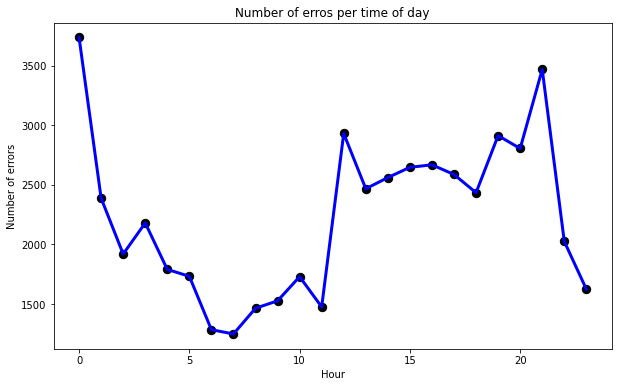

In [34]:
plt.figure(figsize=(10, 6))
plt.title("Number of erros per time of day")
plt.xlabel("Hour")
plt.ylabel("Number of errors")
plt.scatter(list_of_hour, list_of_ui_event_id_count, label = "Number of errors", color = "black", s =
70)
plt.plot(list_of_hour, list_of_ui_event_id_count, color = "blue", linestyle = "-", linewidth = 3)

### Getting the top hours data

Sorting by count

In [35]:
ltng_full_reports_group_sorted = ltng_full_reports_group.sort_values(by=['UI_EVENT_ID_COUNT'], ascending=False)

In [36]:
ltng_full_reports_group_sorted

,TIMESTAMP_DERIVED_HOUR,UI_EVENT_ID_COUNT
0,0,3737
21,21,3469
12,12,2931
19,19,2913
20,20,2805
16,16,2668
15,15,2647
17,17,2587
14,14,2561
13,13,2467


Getting top hours

In [37]:
number_of_top_hours = 5

top_hours = ltng_full_reports_group_sorted.head(number_of_top_hours)

In [38]:
top_hours

,TIMESTAMP_DERIVED_HOUR,UI_EVENT_ID_COUNT
0,0,3737
21,21,3469
12,12,2931
19,19,2913
20,20,2805


Sorting by hours

In [39]:
top_hours = top_hours.sort_values(by=['TIMESTAMP_DERIVED_HOUR'])

In [40]:
top_hours

,TIMESTAMP_DERIVED_HOUR,UI_EVENT_ID_COUNT
0,0,3737
12,12,2931
19,19,2913
20,20,2805
21,21,3469


Reseting index

In [41]:
top_hours = top_hours.reset_index()

In [42]:
top_hours

,index,TIMESTAMP_DERIVED_HOUR,UI_EVENT_ID_COUNT
0,0,0,3737
1,12,12,2931
2,19,19,2913
3,20,20,2805
4,21,21,3469


Result

In [43]:
top_hours_values = []

print("The top hours are: ", end="")
for i in top_hours.index:
    value = top_hours['TIMESTAMP_DERIVED_HOUR'][i]
    
    top_hours_values.append(value)
    
    if i == len(top_hours) - 1:
        print(f"{value}", end="")
    elif i == len(top_hours) - 2:
        print(f"{value} and ", end="")
    else:
        print(f"{value}, ", end="")

The top hours are: 0, 12, 19, 20 and 21

---

## Analyzing the most common error types by day

Getting the count of erros for each type of error

In [44]:
ltng_full_reports_group = ltng_full_reports.groupby(['UI_EVENT_SOURCE']).agg({'UI_EVENT_ID': 'count'})

In [45]:
ltng_full_reports_group.shape

(2, 1)

Renaming the column of ***UI_EVENT_ID*** to ***UI_EVENT_ID_COUNT***

In [46]:
ltng_full_reports_group.rename(columns={'UI_EVENT_ID': 'UI_EVENT_ID_COUNT'}, inplace = True)

In [47]:
ltng_full_reports_group

,UI_EVENT_ID_COUNT
UI_EVENT_SOURCE,
Error,42064
TypeError,11539


Sorting the data by ***UI_EVENT_ID_COUNT***

In [48]:
ltng_full_reports_group = ltng_full_reports_group.sort_values(by=['UI_EVENT_ID_COUNT'], ascending=False)

In [49]:
ltng_full_reports_group

,UI_EVENT_ID_COUNT
UI_EVENT_SOURCE,
Error,42064
TypeError,11539


Viewing the data

Text(0.5, 1.0, 'Types of errors that appear the most during the day')

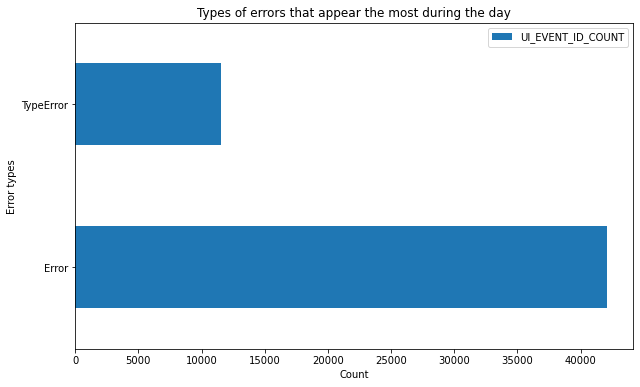

In [50]:
number_of_error_types_graph = 2

graph = ltng_full_reports_group.head(number_of_error_types_graph).plot.barh(figsize=(10, 6))
graph.set_ylabel('Error types')
graph.set_xlabel('Count')
graph.set_title('Types of errors that appear the most during the day')

### Getting top error types by day

In [51]:
number_of_error_types = 2

top_error_types_by_day = ltng_full_reports_group.head(number_of_error_types)

In [52]:
top_error_types_by_day

,UI_EVENT_ID_COUNT
UI_EVENT_SOURCE,
Error,42064
TypeError,11539


Reseting index

In [53]:
top_error_types_by_day = top_error_types_by_day.reset_index()

In [54]:
top_error_types_by_day

,UI_EVENT_SOURCE,UI_EVENT_ID_COUNT
0,Error,42064
1,TypeError,11539


Result

In [55]:
top_error_types_by_day_values = []

print(f"The top {number_of_error_types} error types by day are: ")

for i in top_error_types_by_day.index:
    value = top_error_types_by_day['UI_EVENT_SOURCE'][i]
    
    top_error_types_by_day_values.append(value)
    
    print(f"{i + 1} - {value}")

The top 2 error types by day are: 
1 - Error
2 - TypeError


---

## Analyzing the most common error types by peak time

Getting top hours values

In [56]:
top_hours_values

[0, 12, 19, 20, 21]

Filtering the data by top hours

In [57]:
ltng_full_reports.shape

(53603, 7)

In [58]:
filtered_ltng_full_reports = ltng_full_reports[ltng_full_reports.TIMESTAMP_DERIVED_HOUR.isin(top_hours_values)]

In [59]:
filtered_ltng_full_reports.shape

(15855, 7)

Grouping by ***UI_EVENT_SOURCE***

In [60]:
filtered_ltng_full_reports_group = filtered_ltng_full_reports.groupby(['UI_EVENT_SOURCE']).agg({'UI_EVENT_ID': 'count'})

In [61]:
filtered_ltng_full_reports_group.shape

(2, 1)

In [62]:
filtered_ltng_full_reports_group

,UI_EVENT_ID
UI_EVENT_SOURCE,
Error,12405
TypeError,3450


Renaming the column of ***UI_EVENT_ID*** to ***UI_EVENT_ID_COUNT***

In [63]:
filtered_ltng_full_reports_group.rename(columns={'UI_EVENT_ID': 'UI_EVENT_ID_COUNT'}, inplace = True)

Sorting by ***UI_EVENT_ID_COUNT***

In [64]:
filtered_ltng_full_reports_group_sorted = filtered_ltng_full_reports_group.sort_values(by=['UI_EVENT_ID_COUNT']
                                                                                       , ascending=False)

In [65]:
filtered_ltng_full_reports_group_sorted

,UI_EVENT_ID_COUNT
UI_EVENT_SOURCE,
Error,12405
TypeError,3450


Viewing the data

Text(0.5, 1.0, 'Types of errors that appear the most during the peak time')

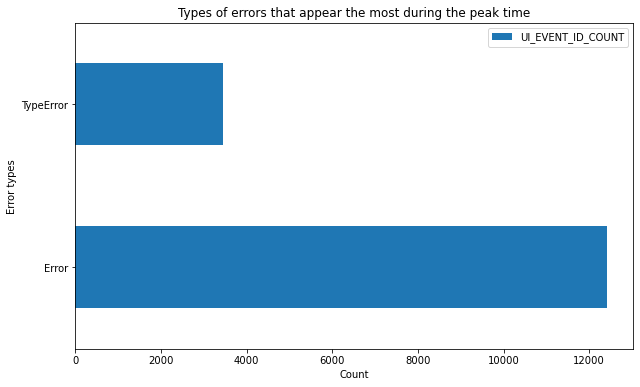

In [66]:
graph = filtered_ltng_full_reports_group_sorted.head(number_of_error_types_graph).plot.barh(figsize=(10, 6))
graph.set_ylabel('Error types')
graph.set_xlabel('Count')
graph.set_title('Types of errors that appear the most during the peak time')

### Getting top error types by peak time

In [67]:
top_error_types_by_peak_time = filtered_ltng_full_reports_group_sorted.head(number_of_error_types)

In [68]:
top_error_types_by_peak_time

,UI_EVENT_ID_COUNT
UI_EVENT_SOURCE,
Error,12405
TypeError,3450


Reseting index

In [69]:
top_error_types_by_peak_time = top_error_types_by_peak_time.reset_index()

Getting top page entity type values and showing result

In [70]:
top_error_types_by_peak_time_values = []

print(f"The top {number_of_error_types} error types by peak time are: ")
for i in top_error_types_by_peak_time.index:
    value = top_error_types_by_peak_time['UI_EVENT_SOURCE'][i]
    
    top_error_types_by_peak_time_values.append(value)
    print(f"{i + 1} - {value}")

The top 2 error types by peak time are: 
1 - Error
2 - TypeError


---

## Analyzing types of errors by peak time

Getting the count of erros for each group of type and hour

In [71]:
ltng_full_reports_group = ltng_full_reports.groupby(['TIMESTAMP_DERIVED_HOUR', 
                                                     'UI_EVENT_SOURCE']).agg({'UI_EVENT_ID': 'count'})

In [72]:
ltng_full_reports_group

UI_EVENT_ID
TIMESTAMP_DERIVED_HOUR UI_EVENT_SOURCE             
0                      Error                   2931
                       TypeError                806
1                      Error                   1894
                       TypeError                494
2                      Error                   1539
                       TypeError                380
3                      Error                   1698
                       TypeError                482
4                      Error                   1402
                       TypeError                388
5                      Error                   1374
                       TypeError                358
6                      Error                   1017
                       TypeError                267
7                      Error                    989
                       TypeError                259
8                      Error                   1146
                       TypeError                318
9                      Error                   1204
                       TypeError                322
10                     Error                   1357
                       TypeError                372
11                     Error                   1157
                       TypeError                318
12                     Error                   2287
                       TypeError                644
13                     Error                   1931
                       TypeError                536
14                     Error                   2009
                       TypeError                552
15                     Error                   2071
                       TypeError                576
16                     Error                   2080
                       TypeError                588
17                     Error                   2039
                       TypeError                548
18                     Error                   1898
                       TypeError                536
19                     Error                   2273
                       TypeError                640
20                     Error                   2189
                       TypeError                616
21                     Error                   2725
                       TypeError                744
22                     Error                   1575
                       TypeError                450
23                     Error                   1279
                       TypeError                345

Reseting index

In [73]:
ltng_full_reports_group = ltng_full_reports_group.reset_index()

Getting the data for the visualization

In [74]:
list_of_hour = ltng_full_reports_group['TIMESTAMP_DERIVED_HOUR'].tolist()
list_of_ui_event_source = ltng_full_reports_group['UI_EVENT_SOURCE'].tolist()
list_of_ui_event_id_count = ltng_full_reports_group['UI_EVENT_ID'].tolist()

Getting the result dictionary format

In [75]:
result = {}

In [76]:
def dictionary_format(list_types_of_erros, list_elements): 
    result = {}
    
    for element in list_elements:
        result[element] = []
        for i in range(len(list_types_of_erros)):
            result[element].append(0)
    
    return result

In [77]:
result = dictionary_format(top_error_types_by_peak_time_values, top_hours_values)

In [78]:
result

{0: [0, 0], 12: [0, 0], 19: [0, 0], 20: [0, 0], 21: [0, 0]}

Mapping the type of error to position

In [79]:
map_types = {}

In [80]:
def mapping_type_to_position(list_types_of_erros):
    for i in range(len(list_types_of_erros)):
        map_types[list_types_of_erros[i]] = i

In [81]:
mapping_type_to_position(top_error_types_by_peak_time_values)

In [82]:
map_types

{'Error': 0, 'TypeError': 1}

Getting the amount of errors for each type and time

In [83]:
def get_amount(list_types, list_of_all_types, list_elements, list_of_all_elements):
    for unique_type in list_types:
        for i in range(len(list_of_all_types)):
            if list_of_all_types[i] == unique_type:
                if list_of_all_elements[i] in list_elements:
                    result[list_of_all_elements[i]][map_types[unique_type]] += list_of_ui_event_id_count[i]

In [84]:
get_amount(top_error_types_by_peak_time_values, list_of_ui_event_source, top_hours_values, list_of_hour)

In [85]:
result

{0: [2931, 806],
 12: [2287, 644],
 19: [2273, 640],
 20: [2189, 616],
 21: [2725, 744]}

In [86]:
list_error = []
list_type_error = [] 

for error_count in result.values():
    list_error.append(error_count[0])
    list_type_error.append(error_count[1])
    
print(list_error, list_type_error)

[2931, 2287, 2273, 2189, 2725] [806, 644, 640, 616, 744]


Viewing the data

In [87]:
def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

Text(0, 0.5, 'Count of errors')

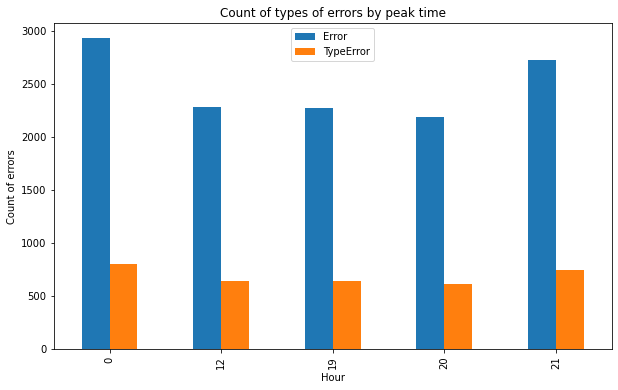

In [88]:
#survey(result, top_error_types_by_peak_time_values)
# plt.ylabel("Hour")
# plt.show()

df = pd.DataFrame({'Hour': top_hours_values, 'Error': list_error, 'TypeError': list_type_error})
# ax = df.plot(x="Hour", y="Error", kind="bar")
# df.plot(x="Hour", y="TypeError", kind="bar", ax=ax, color="maroon", figsize=(10, 6))
ax = df.plot(x="Hour", y=["Error", "TypeError"], kind="bar", figsize=(10, 6), title='Count of types of errors by peak time')
ax.set_ylabel("Count of errors")

---

## Analyzing types of errors by day

Getting the intervals

In [89]:
list_of_unique_hour = ltng_full_reports_group['TIMESTAMP_DERIVED_HOUR'].unique()

In [90]:
number_of_intervals = 6

In [91]:
intervals = []

initial = 0
for i in range(number_of_intervals):
    final = initial + (len(list_of_unique_hour)//number_of_intervals - 1)
    intervals.append(f"{initial}-{final}")
    initial = final + 1

In [92]:
intervals_dict = {}

for interval in intervals:
    interval_values = interval.split("-")
    intervals_dict[interval] = [i for i in range(int(interval_values[0]), int(interval_values[1]) + 1)]

Getting the result dictionary format

In [93]:
result = dictionary_format(top_error_types_by_day_values, intervals)

In [94]:
result

{'0-3': [0, 0],
 '4-7': [0, 0],
 '8-11': [0, 0],
 '12-15': [0, 0],
 '16-19': [0, 0],
 '20-23': [0, 0]}

Mapping the type of error to position

In [95]:
mapping_type_to_position(top_error_types_by_day_values)

In [96]:
map_types

{'Error': 0, 'TypeError': 1}

Getting the amount of errors for each type and time

In [97]:
def get_amount_intervals(list_types, list_of_all_types, intervals, intervals_dict):
    for unique_type in list_types:
        for i in range(len(list_of_all_types)):
            if list_of_all_types[i] == unique_type:
                for interval in intervals:
                    if list_of_hour[i] in intervals_dict[interval]:
                        result[interval][map_types[unique_type]] += list_of_ui_event_id_count[i]

In [98]:
get_amount_intervals(top_error_types_by_day_values, list_of_ui_event_source, intervals, intervals_dict)

In [99]:
result

{'0-3': [8062, 2162],
 '4-7': [4782, 1272],
 '8-11': [4864, 1330],
 '12-15': [8298, 2308],
 '16-19': [8290, 2312],
 '20-23': [7768, 2155]}

Viewing the data

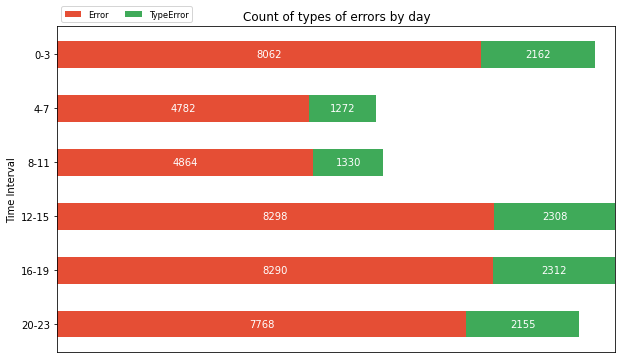

In [100]:
survey(result, top_error_types_by_day_values)
plt.title("Count of types of errors by day")
plt.ylabel("Time Interval")
plt.show()

---